# Heart Disease classification problem

# 1. problem definition

> we have the dataset of patients we should predict whether they have heart disease or not

## 2. Data

> The dataset is downloaded from  :-https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we achieve the model with accuarcy above 80 we will proceed with this project

## 4.Features

* 1.age
* 2.sex
* 3.chest pain type (4 values)
* 4.resting blood pressure
* 5.serum cholestoral in mg/dl
* 6.fasting blood sugar > 120 mg/dl
* 7.resting electrocardiographic results (values 0,1,2)
* 8.maximum heart rate achieved
* 9.exercise induced angina
* 10.oldpeak = ST depression induced by exercise relative to rest
* 11.the slope of the peak exercise ST segment
* 12.number of major vessels (0-3) colored by flourosopy
* 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Getting tools ready

In [53]:
#regular plotting and Eda libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

#import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#lets import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold, cross_val_score

#lets filter warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#lets see for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

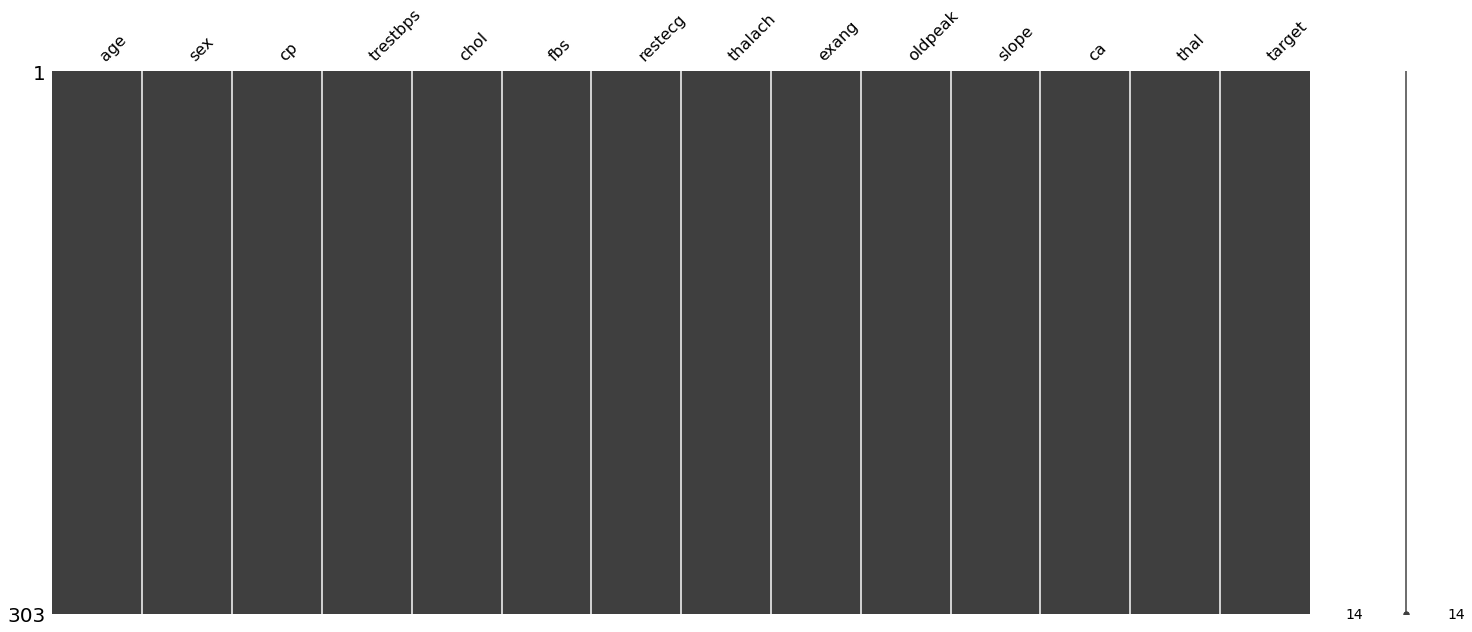

In [5]:
missingno.matrix(df);

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#lets check for the outliers
z_score = abs(zscore(df))
df_new = df.loc[(z_score<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(303, 14)
(287, 14)


* we treated the outliers here

## Exploratory data analysis

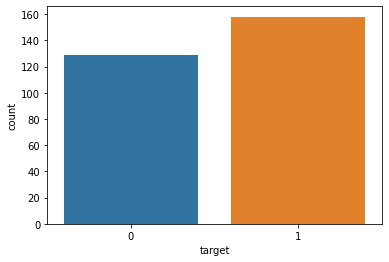

In [11]:
sns.countplot(df_new['target']);

In [20]:
df_new.sex.value_counts()

1    198
0     89
Name: sex, dtype: int64

* There are 198 `Males` and 89 `females` in our study

In [12]:
pd.crosstab(df_new['sex'], df_new['target'])

target,0,1
sex,,
0,20,69
1,109,89


In [14]:
df_new.nunique()

age          41
sex           2
cp            4
trestbps     47
chol        145
fbs           2
restecg       3
thalach      89
exang         2
oldpeak      38
slope         3
ca            4
thal          3
target        2
dtype: int64

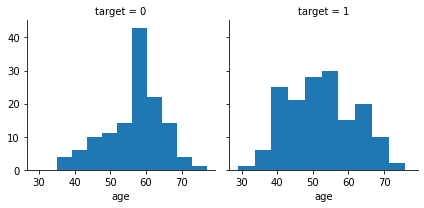

In [18]:
t = sns.FacetGrid(df_new,col =  'target')
t.map(plt.hist, 'age');


* people between the age of `50` to `60` are more likely to have heart disease when compared to others

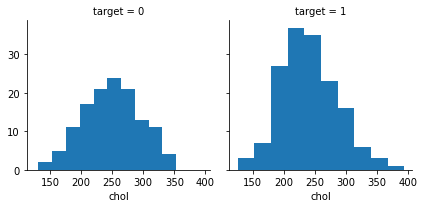

In [19]:
c = sns.FacetGrid(df_new, col = 'target')
c.map(plt.hist, 'chol');

* People with chol value between `200` and ` 250` have more heart disease

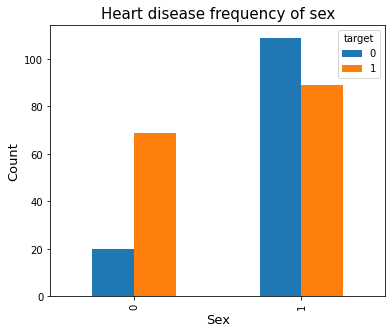

In [30]:
pd.crosstab(df_new['sex'], df_new['target']).plot.bar(figsize = (6,5))
plt.title('Heart disease frequency of sex', fontsize = 15)
plt.xlabel('Sex', fontsize = 13)
plt.ylabel('Count', fontsize = 13);

* Males cases of heart disease is more in our study

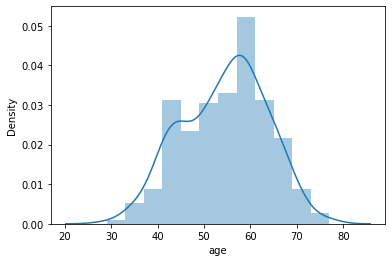

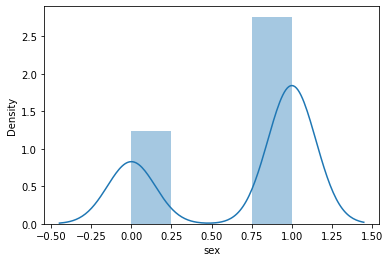

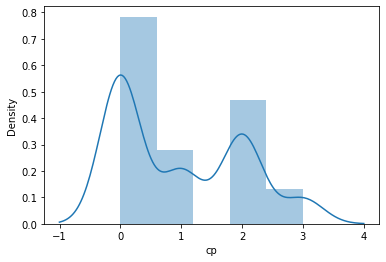

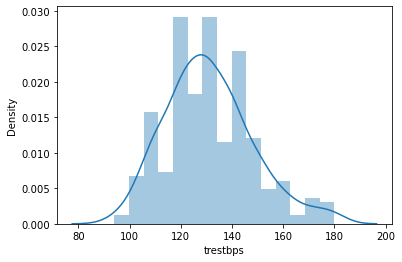

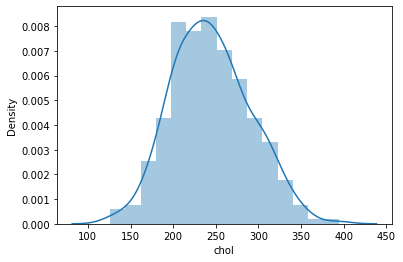

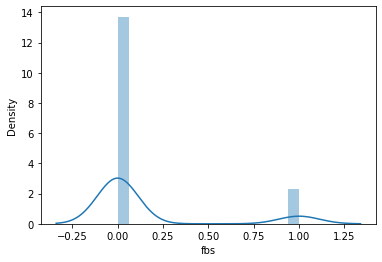

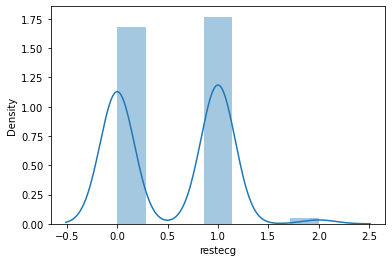

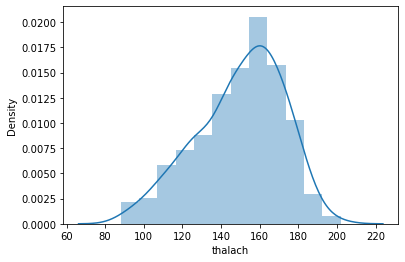

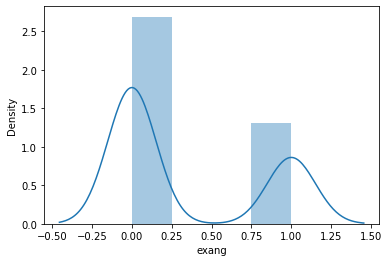

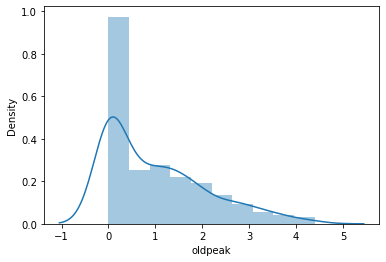

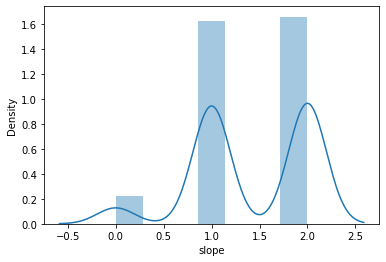

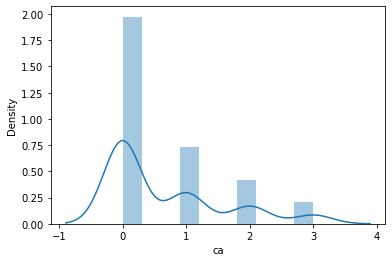

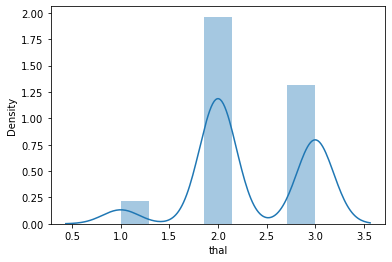

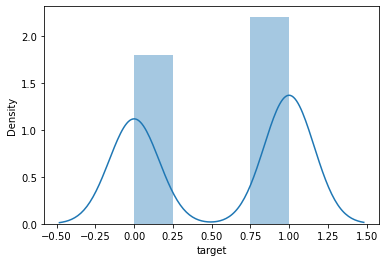

In [29]:
for cols in df.columns:
    sns.distplot(df_new[cols])
    plt.show()

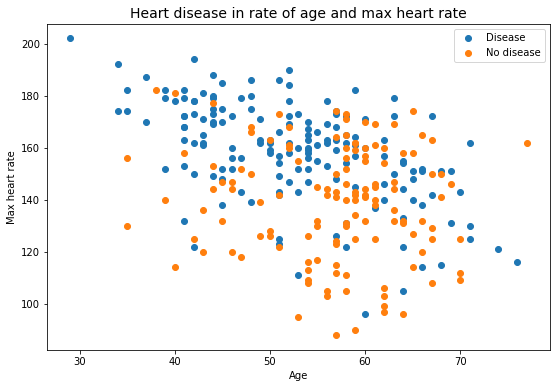

In [34]:
#Age vs max heartrate
plt.figure(figsize = (9,6))
plt.scatter(x = df_new.age[df_new['target'] == 1],
           y = df_new.thalach[df_new['target'] == 1])

plt.scatter(x = df_new.age[df_new['target']== 0],
           y = df_new.thalach[df_new['target'] == 0])
plt.title('Heart disease in rate of age and max heart rate', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No disease']);

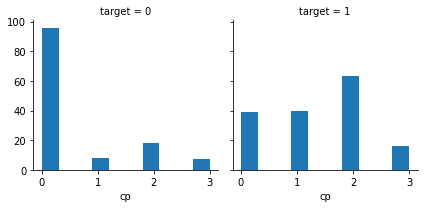

In [45]:
p = sns.FacetGrid(df_new, col = 'target')
p.map(plt.hist, 'cp');

* From this we can see that cp with the value of 2 have more number of heart disease

# Building model

In [47]:
X = df_new.drop('target', axis = 1)
y = df_new['target']

In [49]:
#lets check for the skewnewss
X.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.984256
slope      -0.503916
ca          1.211037
thal       -0.190864
dtype: float64

In [51]:
for cols in X.columns:
    if X.skew().loc[cols] > 0.75:
        X[cols] = np.log1p(X[cols])
        

In [52]:
X.skew()

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.331394
slope      -0.503916
ca          0.765030
thal       -0.190864
dtype: float64

* we treated the skewness with log method

In [54]:
#lets scale the values 
sd = StandardScaler()
X_new = sd.fit_transform(X)

In [55]:
#lets split the data into train and test
X_train ,X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.2)

In [56]:
#Lets train the models
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('\n')

LogisticRegression()
[[18  3]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.91      0.84      0.87        37

    accuracy                           0.84        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.85      0.84      0.85        58



DecisionTreeClassifier()
[[15  6]
 [15 22]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        21
           1       0.79      0.59      0.68        37

    accuracy                           0.64        58
   macro avg       0.64      0.65      0.63        58
weighted avg       0.68      0.64      0.64        58



SVC()
[[17  4]
 [ 5 32]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.89      0.86      0.88        37

    accuracy                           0.84        58
   macro avg   

## Ensemble technique

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  4]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.88      0.78      0.83        37

    accuracy                           0.79        58
   macro avg       0.78      0.80      0.78        58
weighted avg       0.81      0.79      0.80        58



##  Boosting technique

In [58]:
adb = AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators= 100,learning_rate = 0.1, algorithm = 'SAMME.R')
adb.fit(X_train,y_train )
pred_adb = adb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  4]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.88      0.78      0.83        37

    accuracy                           0.79        58
   macro avg       0.78      0.80      0.78        58
weighted avg       0.81      0.79      0.80        58



**After this experimentation I choose `LogisticRegression`**

In [ ]:
base_estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
            'base_estimator__C':[0.001,0.01,0.1,1,10,100,1000]}

### Lets try to improve our model with hyperparameter tuning

In [60]:
cv = KFold(n_splits = 10)
params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
         'C' : [0.001, 0.01, 0.1, 1, 10, 100, 200,1000]}

In [62]:
log_grid = GridSearchCV(LogisticRegression(),
                       param_grid = params,
                        cv = cv,
                       verbose = True,
                       scoring = 'accuracy')
log_grid.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy', verbose=True)

In [63]:
log_grid.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [66]:
pred_grid = log_grid.predict(X_test)
print(confusion_matrix(y_test, pred_grid))
print(classification_report(y_test, pred_grid))

[[18  3]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.91      0.84      0.87        37

    accuracy                           0.84        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.85      0.84      0.85        58



* we are getting the same score after tuning so proceeding with log_grid

# Metrics

**Classification report**

In [67]:
print(classification_report(y_test, pred_grid))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        21
           1       0.91      0.84      0.87        37

    accuracy                           0.84        58
   macro avg       0.83      0.85      0.84        58
weighted avg       0.85      0.84      0.85        58



**Confusion Matrix**

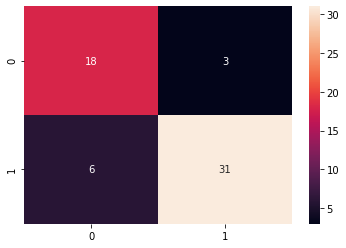

In [68]:
sns.heatmap(confusion_matrix(y_test, pred_grid),
           annot = True);

**ROC Curve**

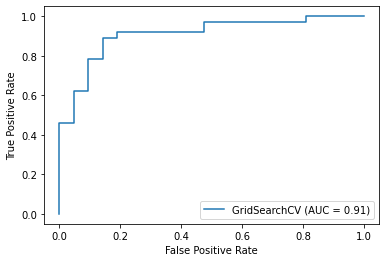

In [69]:
plot_roc_curve(log_grid, X_test, y_test);

# Saving Model

In [71]:
import joblib
joblib.dump(log_grid, 'Heart_disease_prediction.pkl')

['Heart_disease_prediction.pkl']